In [1]:
import numpy as np
import random
from random import sample
import matplotlib.pyplot as plt

In [5]:
# Returns the final piece of paper when a random game with N pieces of paper is played
def final_paper(N):
    
    hat = np.arange(1, N+1)
    diffs = np.zeros(N-1, dtype=int)
    pick = np.zeros((N-1, 2), dtype=int)
    
    for i in range(N-1):
        pick[i] = np.random.choice(hat, 2, replace=False)

        if pick[i][0] > pick[i][1]:
            diffs[i] = pick[i][0] - pick[i][1]
        else:
            diffs[i] = pick[i][1] - pick[i][0]

        ind0 = np.argwhere(hat==pick[i][0])
        ind1 = np.argwhere(hat==pick[i][1])

        if len(ind0) > 1:
            ind0 = ind0[0]

        if len(ind1) > 1:
            ind1 = ind1[1]

        ind = np.column_stack((ind0, ind1))

        hat = np.delete(hat, ind)
        hat = np.append(hat, diffs[i])

    return hat[0]


# Returns an array of possible X_N and an array of their frequencies over 10000 games
def counts(N):
    results = np.zeros(iters, dtype=int)

    for m in range(iters):
        results[m] = final_paper(N)

    counts = np.unique(results, return_counts = True)
    
    return counts[0], counts[1]
    

# Prints the possible X_N for games N=1 to N=N
def print_papers(N):
    for n in range(2, N+1):
        papers, _ = counts(n)
        print(f"n={n}: X_{n} = {papers}")


# Choose our N and number of iterations
N = 100
iters = 10000

# Check up to N=20 the possible X_N
print_papers(20)

n=2: X_2 = [1]
n=3: X_3 = [0 2]
n=4: X_4 = [0 2 4]
n=5: X_5 = [1 3 5]
n=6: X_6 = [1 3 5]
n=7: X_7 = [0 2 4 6]
n=8: X_8 = [0 2 4 6 8]
n=9: X_9 = [1 3 5 7 9]
n=10: X_10 = [1 3 5 7 9]
n=11: X_11 = [ 0  2  4  6  8 10]
n=12: X_12 = [ 0  2  4  6  8 10 12]
n=13: X_13 = [ 1  3  5  7  9 11 13]
n=14: X_14 = [ 1  3  5  7  9 11 13]
n=15: X_15 = [ 0  2  4  6  8 10 12 14]
n=16: X_16 = [ 0  2  4  6  8 10 12 14 16]
n=17: X_17 = [ 1  3  5  7  9 11 13 15 17]
n=18: X_18 = [ 1  3  5  7  9 11 13 15 17]
n=19: X_19 = [ 0  2  4  6  8 10 12 14 16 18]
n=20: X_20 = [ 0  2  4  6  8 10 12 14 16 18 20]


P(X_100=2)=[[0.0758]]


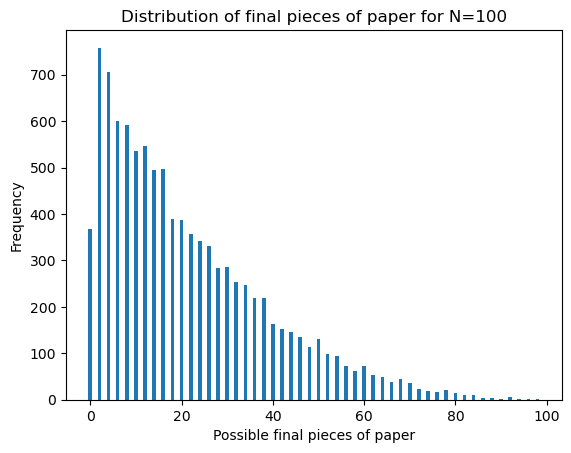

In [4]:
# Prints the probability of a particular X_N and plots frequency against X_N over 10000 games
def prob_and_plot(N, x):

    papers, freqs = counts(N)
    if x in papers:
        value = np.argwhere(papers==x)
        prob = freqs[value] / iters
        print(f"P(X_{N}={x})={prob}")
    else:
        print(f"P(X_{N}={x})=0")

    plt.bar(papers, freqs)
    plt.title(f"Distribution of final pieces of paper for N={N}")
    plt.xlabel("Possible final pieces of paper")
    plt.ylabel("Frequency")

    plt.show()


# Produce plot and probability for x
prob_and_plot(N, 2)